In [1]:
# Import Necessary Libraries

import os
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf
#from nsepy import get_history

In [2]:
#sbin=pd.read_csv('bitcoin.csv')
sbin=pd.read_csv('SCI.csv')

df_close=sbin['Close'].reset_index()

print(sbin.head(-10))
print(sbin.info())



           Date    Close     Open     High      Low Trading_volume   Price  \
0      2/8/2024  2865.90  2832.49  2867.47  2827.90         53.11B   1.28%   
1      2/7/2024  2829.70  2791.51  2829.70  2770.53         54.71B   1.44%   
2      2/6/2024  2789.49  2680.48  2802.93  2669.67         50.28B   3.23%   
3      2/5/2024  2702.19  2716.08  2739.74  2635.09         47.90B  -1.02%   
4      2/2/2024  2730.15  2773.29  2791.68  2666.33         42.62B  -1.46%   
...         ...      ...      ...      ...      ...            ...     ...   
8074  1/22/1991   133.72   133.72   134.24   133.66            NaN  -0.39%   
8075  1/21/1991   134.24   133.70   134.24   133.66            NaN   0.00%   
8076  1/18/1991   134.24   133.70   134.25   133.67            NaN  -0.01%   
8077  1/17/1991   134.25   133.67   134.25   133.65            NaN   0.01%   
8078  1/16/1991   134.24   134.19   134.74   134.14            NaN  -0.37%   

      Unnamed: 7  Unnamed: 8  Unnamed: 9  
0            NaN    

In [3]:

sbin['Close'] = pd.to_numeric(sbin['Close'])

#sbin['Open'] = pd.to_numeric(sbin['Open'], errors='coerce')
#sbin['High'] = pd.to_numeric(sbin['High'], errors='coerce')

sbin['Date'] = pd.to_datetime(sbin['Date'], errors='coerce')
print(sbin.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8089 entries, 0 to 8088
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            8089 non-null   datetime64[ns]
 1   Close           8089 non-null   float64       
 2   Open            8089 non-null   float64       
 3   High            8089 non-null   float64       
 4   Low             8089 non-null   float64       
 5   Trading_volume  7088 non-null   object        
 6   Price           8089 non-null   object        
 7   Unnamed: 7      0 non-null      float64       
 8   Unnamed: 8      0 non-null      float64       
 9   Unnamed: 9      1 non-null      float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 632.1+ KB
None


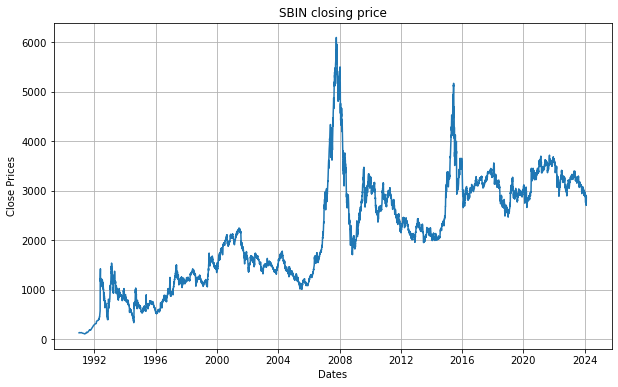

In [4]:
# Plotting Time data

plt.figure(figsize=(10,6))
plt.grid(True)

plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(sbin['Date'],sbin['Close'])
plt.title('SBIN closing price')
plt.show()

In [5]:
# Re-arranging Index

df1=sbin.iloc[::-1]
print(df1.head())
print(df1.shape)
df2=pd.DataFrame(data=df1.values, columns=df1.columns, index=range(0,df1.shape[0]))
print(df2.head())

           Date   Close    Open    High     Low Trading_volume  Price  \
8088 1991-01-02  128.84  127.61  128.84  127.61            NaN  0.96%   
8087 1991-01-03  130.14  128.84  130.14  128.84            NaN  1.01%   
8086 1991-01-04  131.44  131.27  131.44  130.14            NaN  1.00%   
8085 1991-01-07  132.06  131.99  132.06  131.45            NaN  0.47%   
8084 1991-01-08  132.68  132.62  132.68  132.06            NaN  0.47%   

      Unnamed: 7  Unnamed: 8  Unnamed: 9  
8088         NaN         NaN         NaN  
8087         NaN         NaN         NaN  
8086         NaN         NaN         NaN  
8085         NaN         NaN         NaN  
8084         NaN         NaN         NaN  
(8089, 10)
        Date   Close    Open    High     Low Trading_volume  Price Unnamed: 7  \
0 1991-01-02  128.84  127.61  128.84  127.61            NaN  0.96%        NaN   
1 1991-01-03  130.14  128.84  130.14  128.84            NaN  1.01%        NaN   
2 1991-01-04  131.44  131.27  131.44  130.14     

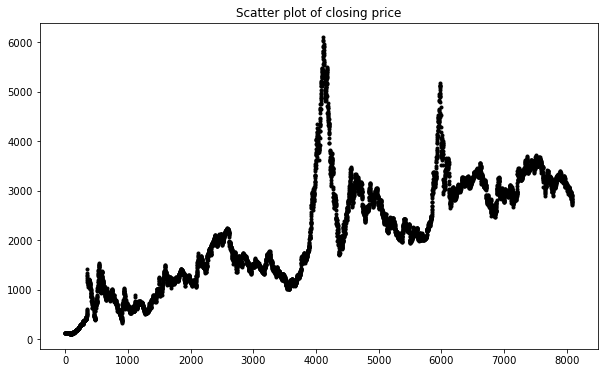

In [6]:
# Scatter Plot of re-arranged indexed dataframe


plt.figure(figsize=(10,6))
df_close = df2['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

In [7]:
print(df1.describe())

             Close         Open         High          Low  Unnamed: 7  \
count  8089.000000  8089.000000  8089.000000  8089.000000         0.0   
mean   2114.240070  2112.928526  2131.731147  2092.764274         NaN   
std    1091.998759  1090.796573  1099.997658  1080.712825         NaN   
min     105.770000   105.120000   105.860000   104.960000         NaN   
25%    1223.570000  1225.380000  1237.910000  1209.480000         NaN   
50%    2071.430000  2068.860000  2082.030000  2055.380000         NaN   
75%    3026.050000  3026.660000  3048.120000  3004.220000         NaN   
max    6092.060000  6057.430000  6124.040000  6040.710000         NaN   

       Unnamed: 8  Unnamed: 9  
count         0.0         1.0  
mean          NaN     -2447.0  
std           NaN         NaN  
min           NaN     -2447.0  
25%           NaN     -2447.0  
50%           NaN     -2447.0  
75%           NaN     -2447.0  
max           NaN     -2447.0  


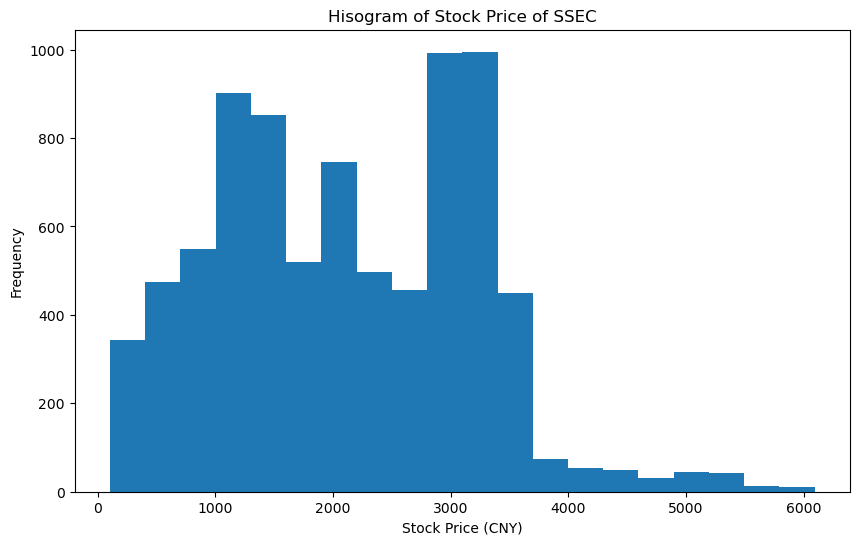

In [8]:
# Histogram of Closing Price of BitCoin
plt.style.use('default')
plt.figure(figsize=(10,6))
#df_close = sbin.Close[sbin.Close.index[::-1]].values
df_close.plot(style='k.',kind='hist', bins=20)
plt.title('Hisogram of Stock Price of SSEC')
plt.xlabel('Stock Price (CNY)')
plt.show()

Neural Network

In [9]:
# import libraries

import math
import pandas as pd
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt
import os
from pandas_datareader import data as pdr
import yfinance as yf

plt.style.use('fivethirtyeight')

In [10]:
# Selecting data points as the paper

#idxs=df2.index[df2['Date']=='2011-01-06'].values
idxs=df2.index[df2['Date']=='2014-04-10'].values

#print(idxs, df2.Close[idxs])
#print(idxs)
idxn=df2.index[df2['Date']=='2023-04-20'].values
#print('ddd',idxn)

dataT=df2.filter(['Close'])  # Total dataset

data=dataT[int(idxs):int(idxn)]  # Dataset equal to the paper

#print(data)
dataset=data.values
#print('dataset = ', dataset)


In [11]:
print(data.describe())
print(data.info())


print('mean =',data.Close.mean())

print('min =',data.Close.min())
print('max =',data.Close.max())
print('std =',data.Close.std())
print('skew =',data.Close.skew())
print('kurt =',data.Close.kurt())

from statsmodels.tsa.stattools import adfuller, kpss

print('Adf test :Ho: Non-Stationary, H1: Stationary \n',adfuller(dataset))
#H0: Non-Stationary
#H1: stationary
print('KPSS test : Ho: Stationary, H1: Not Stationary   \n',kpss(dataset))
#H0: Stationary
#H1: Non-stationary
from scipy.stats import norm, kurtosis, skew, shapiro, normaltest

# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
print('Shapiro Test: Ho: Data frm Normal Dist \n', shapiro(dataset))
#print(normaltest(dataset))

#H0: data from normal distribution
#H1: data not from normal distribution    

print('kurtosis: ',kurtosis(dataset))
#print(skew(dataT))

          Close
count   2199.00
unique  2177.00
top     3052.78
freq       3.00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 5691 to 7889
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   2199 non-null   object
dtypes: object(1)
memory usage: 17.3+ KB
None
mean = 3142.8059436107333
min = 2003.49
max = 5166.35
std = 437.6613442220062
skew = 0.30314513054375797
kurt = 2.89296832896721
Adf test :Ho: Non-Stationary, H1: Stationary 
 (-3.382257490411511, 0.011578789155572453, 26, 2172, {'1%': -3.4333642933695216, '5%': -2.862871610424875, '10%': -2.567478882724717}, 22619.055863923935)
KPSS test : Ho: Stationary, H1: Not Stationary   
 (0.5386015328542514, 0.03297262773552896, 28, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
Shapiro Test: Ho: Data frm Normal Dist 
 ShapiroResult(statistic=0.9402568936347961, pvalue=6.591512086552328e-29)
kurtosis:  [2.88366732474878]


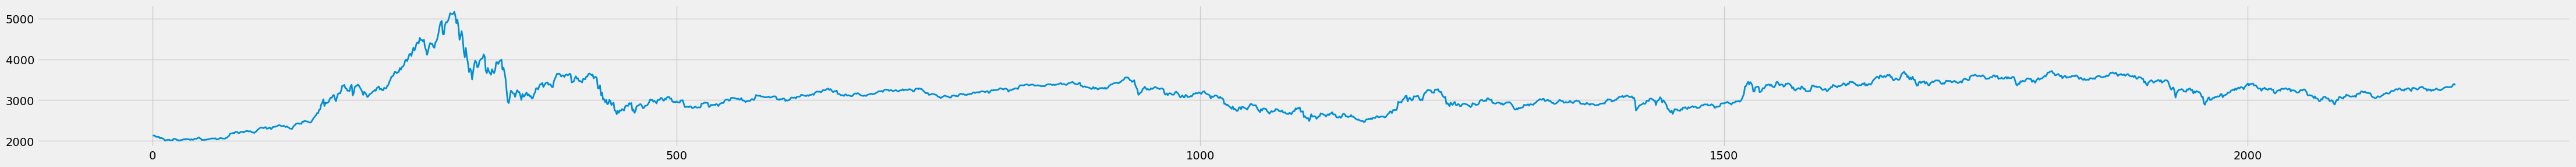

In [12]:
plt.figure(figsize=(50,3))
plt.plot(dataset, linewidth=2, )

In [13]:
# Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

#print(scaled_data)

In [14]:
# Create the training dataset


training_data_len=math.ceil(len(dataset)* 0.7999)
print(training_data_len)



train_data=scaled_data[0:training_data_len,:]

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    #if i <=61:
        #print(x_train)
        #print(y_train)

        
# create Test dataset


        
test_data=scaled_data[training_data_len -60: , :]

x_test=[]
y_test= dataset [training_data_len:, :]



for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

1759


In [15]:
#convert x_train and y_train to numpy array


x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)


# convert data to numpy array 

x_test= np.array(x_test)
print(x_test.shape)



(1699, 60)
(440, 60)


In [16]:
#reshape the data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
print(x_train.shape)


x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))
print(x_test.shape)



(1699, 60, 1)
(440, 60, 1)


# Model Create and train 

In [57]:
# LSTM-Attention-Dense


import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, GlobalAveragePooling1D, Reshape
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt



# Transformer Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs

    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return x + res

# Model Definition
inputs = Input(shape=(x_train.shape[1], x_train.shape[2]))
#x = LSTM(30, return_sequences = True, input_shape = (60,1))(inputs)
x = LSTM(60, return_sequences = True, input_shape = (60,1))(inputs)
#x = LSTM(20, return_sequences = False)(x)
x = LSTM(60, return_sequences = False)(x)
#x = Reshape((20,1))(x)
x = Reshape((60,1))(x)
x = Dropout(0.1)(x)
x = transformer_encoder(x, head_size=120, num_heads=5, ff_dim=5, dropout=0.15)
#x = transformer_encoder(x, head_size=15, num_heads=4, ff_dim=4, dropout=0.15)

x = GlobalAveragePooling1D(data_format='channels_first')(x)
x = Dropout(0.1)(x)
#x = Dense(50, activation="relu")(x)
#x = Dropout(0.1)(x)

x = Dense(30, activation="relu")(x)
outputs = Dense(1, activation="linear")(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="adam", loss="mean_squared_error")

# Model Summary
model.summary()


history=model.fit(x_train, y_train,  epochs=12, batch_size=1, use_multiprocessing=True, workers=12, verbose=1)


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 60, 1)]      0           []                               
                                                                                                  
 lstm_6 (LSTM)                  (None, 60, 60)       14880       ['input_4[0][0]']                
                                                                                                  
 lstm_7 (LSTM)                  (None, 60)           29040       ['lstm_6[0][0]']                 
                                                                                                  
 reshape_3 (Reshape)            (None, 60, 1)        0           ['lstm_7[0][0]']                 
                                                                                            

In [ ]:
## Only Dense Model 


import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, GlobalAveragePooling1D, Reshape
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt


model=Sequential()
model.add(Dense(80, input_shape = (60,1)))
model.add(Flatten())
model.add(Dense(80, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

model.summary()
#from sklearn.metrics import classification_report, confusion_matrix

model.compile(optimizer = 'adam', loss='mean_squared_error', metrics=['mse'])

In [60]:
# More Training (if Required)

model.fit(x_train, y_train, batch_size=1, epochs=5, use_multiprocessing=True, workers=12)



Epoch 1/5
1699/1699 [==============================] - 25s 15ms/step - loss: 6.6655e-04
Epoch 2/5
1699/1699 [==============================] - 26s 15ms/step - loss: 6.2576e-04
Epoch 3/5
1699/1699 [==============================] - 26s 15ms/step - loss: 6.6279e-04
Epoch 4/5
1699/1699 [==============================] - 26s 15ms/step - loss: 5.9156e-04
Epoch 5/5
1699/1699 [==============================] - 25s 15ms/step - loss: 6.3361e-04


In [61]:
# Get the models predicted price values

predictions = model.predict(x_test)
print(predictions.shape)

predictions=np.reshape(predictions,(predictions.shape[0], predictions.shape[1]))
#print(x_test.shape)

# un-scaling 
predictions = scaler.inverse_transform(predictions)



14/14 [==============================] - 0s 34ms/step
(440, 1)


In [62]:
#Get the root mean squared error (RMSE) 
rmse= np.sqrt( np.mean((predictions - y_test)**2))
print('Root Mean Square Error',rmse)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score


# Calculate test metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

r2 = r2_score(y_test, predictions)
evs = explained_variance_score(y_test, predictions)

mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
mpe = np.mean((y_test - predictions) / y_test) * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root-Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Percentage Error (MPE): {mpe}")

Root Mean Square Error 41.28076203259257
Mean Squared Error (MSE): 1704.1013139915378
Root-Mean Squared Error (RMSE): 41.28076203259259
Mean Absolute Error (MAE): 31.929805553089484
R2 Score: 0.9551674067941397
Explained Variance Score: 0.955210028070278
Mean Absolute Percentage Error (MAPE): 0.967387635187199
Mean Percentage Error (MPE): -0.0028254929437221896


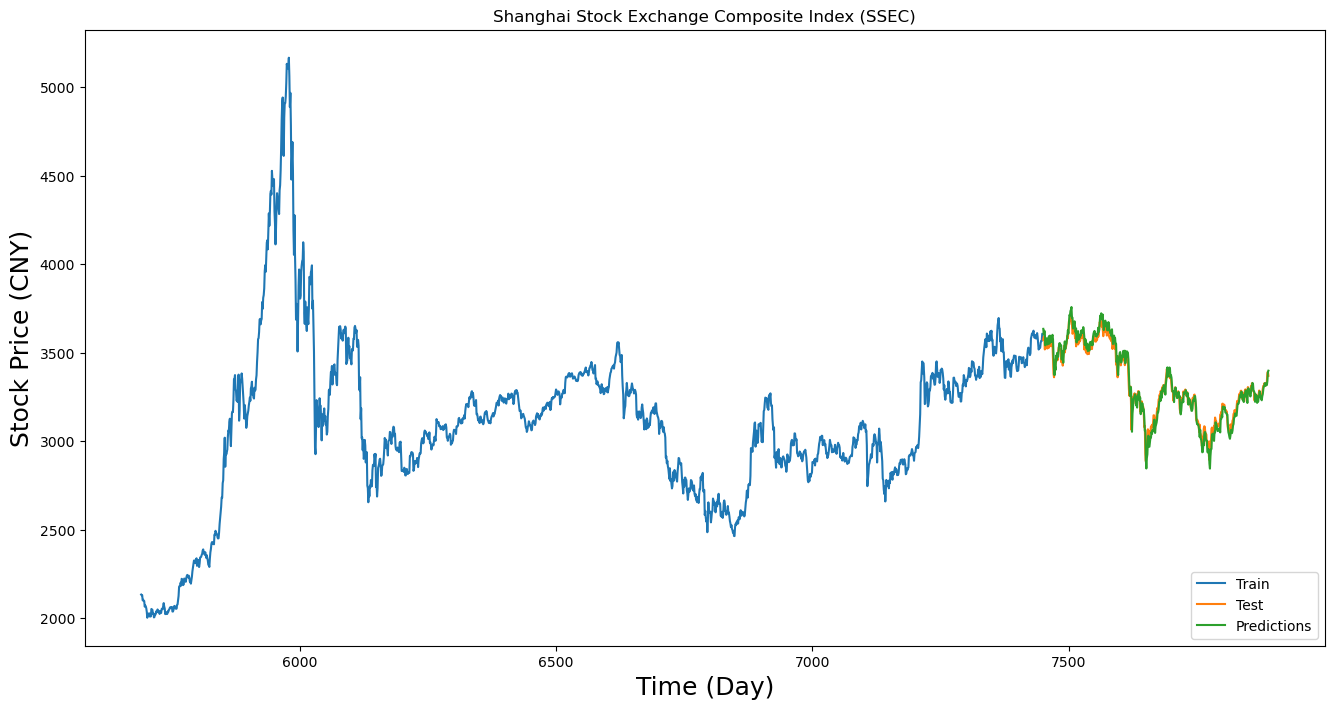

In [65]:
#plot the data
plt.style.use('default')
train=data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Shanghai Stock Exchange Composite Index (SSEC)')
plt.xlabel('Time (Day)', fontsize=18)
plt.ylabel('Stock Price (CNY)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Test', 'Predictions'], loc = 'lower right')

In [38]:
print(train.Close.index.values)

[5691 5692 5693 ... 7447 7448 7449]


40.376680358112004


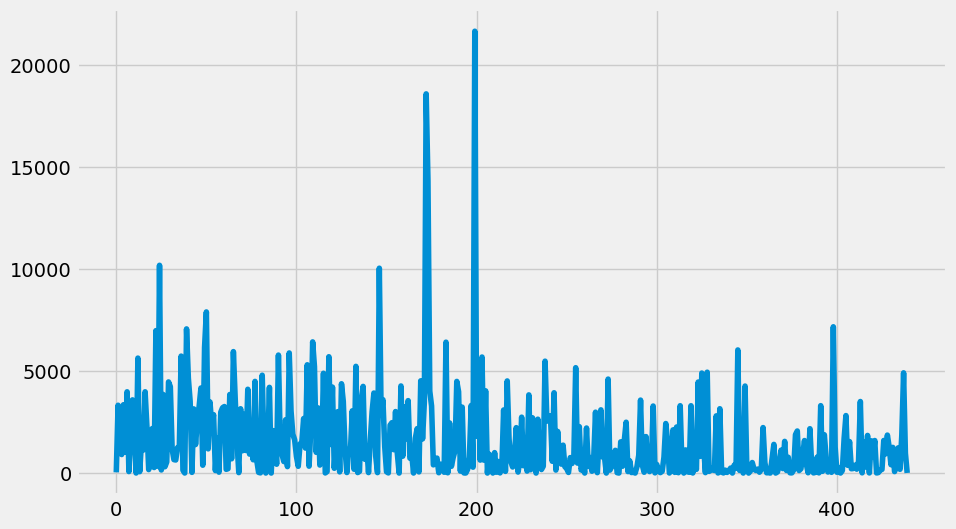

In [68]:
error=((y_test-predictions)**2)
plt.plot(error)

print(np.sqrt(np.sum(error)/len(error)))

In [30]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

#keras.utils.plot_model(model1, "Model1.png", show_shapes=True)
#keras.utils.plot_model(model2, "Model2.png", show_shapes=True)

NameError: name 'keras' is not defined

# Model and session save

In [18]:
import dill                            #pip install dill --user
import keras

# Calling `save('my_model.keras')` creates a zip archive `my_model.keras`.
model.save("LSTMTransDense_SCI_41.28_IRMSE.keras")

filename = 'globalsave_LSTMTransDense_SCI_41.28_IRMSE.pkl'
dill.dump_session(filename)



# It can be used to reconstruct the model identically.
#reconstructed_model = keras.models.load_model("LSTM_model.keras")
#model = keras.models.load_model('LSTM_model.keras')
# Let's check:
#np.testing.assert_allclose(
#    model.predict(test_input), reconstructed_model.predict(test_input)
#)

NameError: name 'model' is not defined

In [70]:
## Saving as pickle file


import pickle

# save the iris classification model as a pickle file
model_pkl_file = "LSTMTransDense_SCI_41.28_IRMSE.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

INFO:tensorflow:Assets written to: ram://5c79ee2d-71c1-4b8a-8d93-28b6cd5b4648/assets


INFO:tensorflow:Assets written to: ram://5c79ee2d-71c1-4b8a-8d93-28b6cd5b4648/assets


# Saved Model Load from Disk

In [19]:
# load model from keras file


import numpy as np
import keras
import dill                            #pip install dill --user


#filename = 'globalsave_LSTM.pkl'

#dill.load_session(filename)

reconstructed_model = keras.models.load_model("LSTMTransDense_SCI_41.28_IRMSE.keras")

# Let's check:
np.testing.assert_allclose(
    reconstructed_model.predict(x_test), reconstructed_model.predict(x_test)
)


14/14 [==============================] - 0s 21ms/step


In [20]:
import pickle

model_pkl_file = "LSTMTransDense_SCI_41.28_IRMSE.pkl" 

with open(model_pkl_file, 'rb') as file:  
    reconstructed_model = pickle.load(file)


        
# evaluate model 
y_predict = reconstructed_model.predict(x_test)

# check results
#print(classification_report(y_test, y_predict)) 

ModuleNotFoundError: No module named 'keras.saving.pickle_utils'

In [21]:
reconstructed_model.summary()



predictions = reconstructed_model.predict(x_test)
print(predictions.shape)

predictions=np.reshape(predictions,(predictions.shape[0], predictions.shape[1]))
#print(x_test.shape)

# un-scaling 
predictions = scaler.inverse_transform(predictions)


rmse= np.sqrt( np.mean((predictions - y_test)**2))
print('Root Mean Square Error',rmse)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 60, 1)]              0         []                            
                                                                                                  
 lstm_6 (LSTM)               (None, 60, 60)               14880     ['input_4[0][0]']             
                                                                                                  
 lstm_7 (LSTM)               (None, 60)                   29040     ['lstm_6[0][0]']              
                                                                                                  
 reshape_3 (Reshape)         (None, 60, 1)                0         ['lstm_7[0][0]']              
                                                                                            

In [22]:
#Get the root mean squared error (RMSE) 
rmse= np.sqrt( np.mean((predictions - y_test)**2))
print('Root Mean Square Error',rmse)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score


# Calculate test metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

r2 = r2_score(y_test, predictions)
evs = explained_variance_score(y_test, predictions)

mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
mpe = np.mean((y_test - predictions) / y_test) * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root-Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Percentage Error (MPE): {mpe}")

Root Mean Square Error 41.28075717620605
Mean Squared Error (MSE): 1704.1009130408893
Root-Mean Squared Error (RMSE): 41.28075717620607
Mean Absolute Error (MAE): 31.929801114169027
R2 Score: 0.9551674173426072
Explained Variance Score: 0.9552100388417079
Mean Absolute Percentage Error (MAPE): 0.9673874978083375
Mean Percentage Error (MPE): -0.0028255924285651543


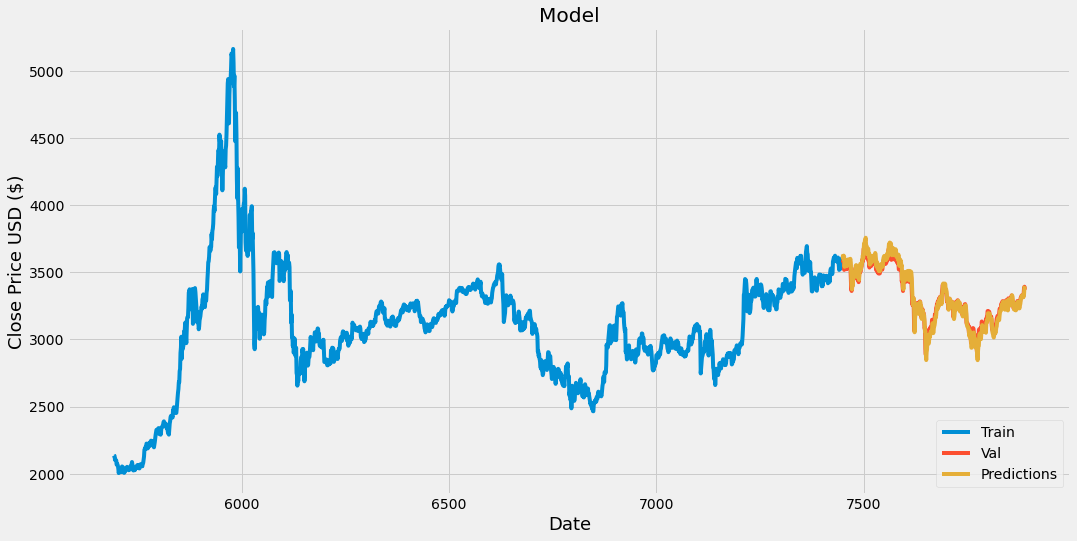

In [59]:
#plot the data

train=data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val', 'Predictions'], loc = 'lower right')

In [ ]:
#plot the data

train=data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val', 'Predictions'], loc = 'lower right')

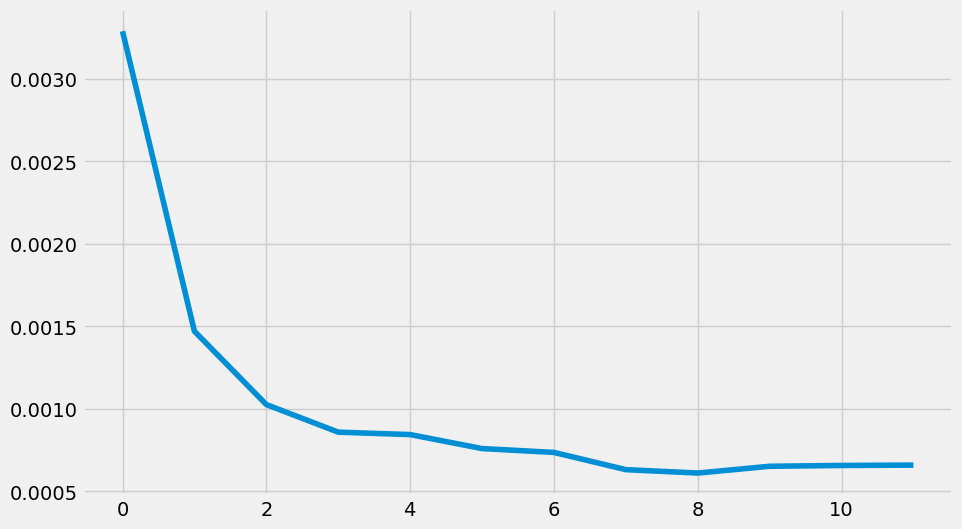

In [88]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# save to json:  
#hist_json_file = 'history.json' 
#with open(hist_json_file, mode='w') as f:
#    hist_df.to_json(f)

# or save to csv: 
#hist_csv_file = 'history.csv'
#with open(hist_csv_file, mode='w') as f:
#    hist_df.to_csv(f)

plt.plot(hist_df.loss)

In [17]:
#reconstructed_model = keras.models.load_model(
#    "LSTM_model.keras",
#    custom_objects={"CustomLayer": CustomLayer, "custom_fn": custom_fn},
#)

# Test Dataset!

In [40]:
##############################  TEST #######################


data_new=dataT[3674:]
print(data_new.shape)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_new=scaler.fit_transform(data_new)
#y_test= dataset [training_data_len:, :]
test_data_new=scaled_data_new
print(scaled_data_new)


x_test=[]
y_test= data_new[60:]


for i in range (60, len(test_data_new)):
    x_test.append(test_data_new[i-60:i,0])

x_test= np.array(x_test)

print(x_test.shape)

x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

    

#print(x_test)
#print(y_test)


(4415, 1)
[[0.        ]
 [0.00085406]
 [0.00177861]
 ...
 [0.33476952]
 [0.34286894]
 [0.35016064]]
(4355, 60)


In [41]:
predictions = reconstructed_model.predict(x_test)
print(predictions.shape)

predictions=np.reshape(predictions,(predictions.shape[0], predictions.shape[1]))
#print(x_test.shape)

# un-scaling 
predictions = scaler.inverse_transform(predictions)



137/137 [==============================] - 1s 5ms/step
(4355, 1)


In [42]:
#Get the root mean squared error (RMSE) 

rmse= np.sqrt( np.mean((predictions - y_test)**2))
rmse


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score


# Calculate test metrics
mse = mean_squared_error(y_test.values, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test.values, predictions)

r2 = r2_score(y_test.values, predictions)
evs = explained_variance_score(y_test.values, predictions)

mape = np.mean(np.abs((y_test.values, predictions) / y_test.values)) * 100
mpe = np.mean((y_test.values, predictions) / y_test.values) * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root-Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Percentage Error (MPE): {mpe}")

Mean Squared Error (MSE): 8229.15877496496
Root-Mean Squared Error (RMSE): 90.71471090713436
Mean Absolute Error (MAE): 71.74078110424439
R2 Score: 0.983287971932333
Explained Variance Score: 0.9912581548544676
Mean Absolute Percentage Error (MAPE): 101.29260654512046
Mean Percentage Error (MPE): 101.29260654512046


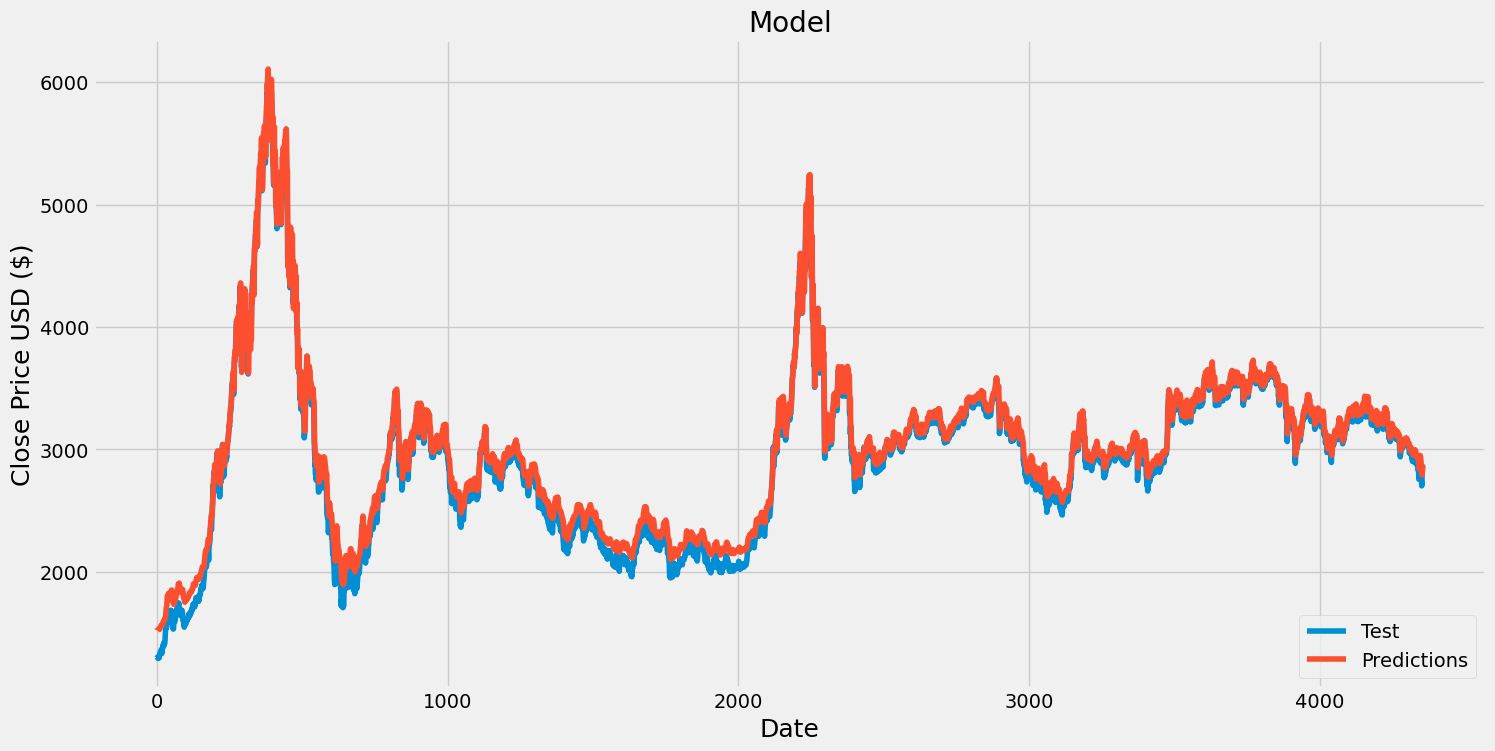

In [43]:
#train=data[:training_data_len]
#valid = data[training_data_len:]
#valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(y_test.values)
plt.plot(predictions)

#plt.plot(train['Close'])
#plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Test', 'Predictions'], loc = 'lower right')

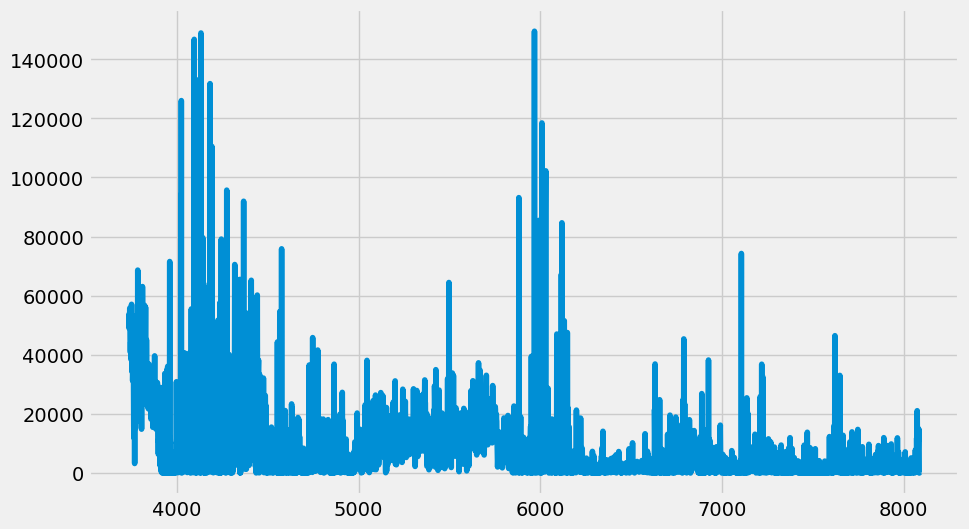

In [44]:
error=((y_test-predictions)**2)
plt.plot(error)

#rmse= np.sqrt(np.sum(error)/len(error))
#print(rmse)

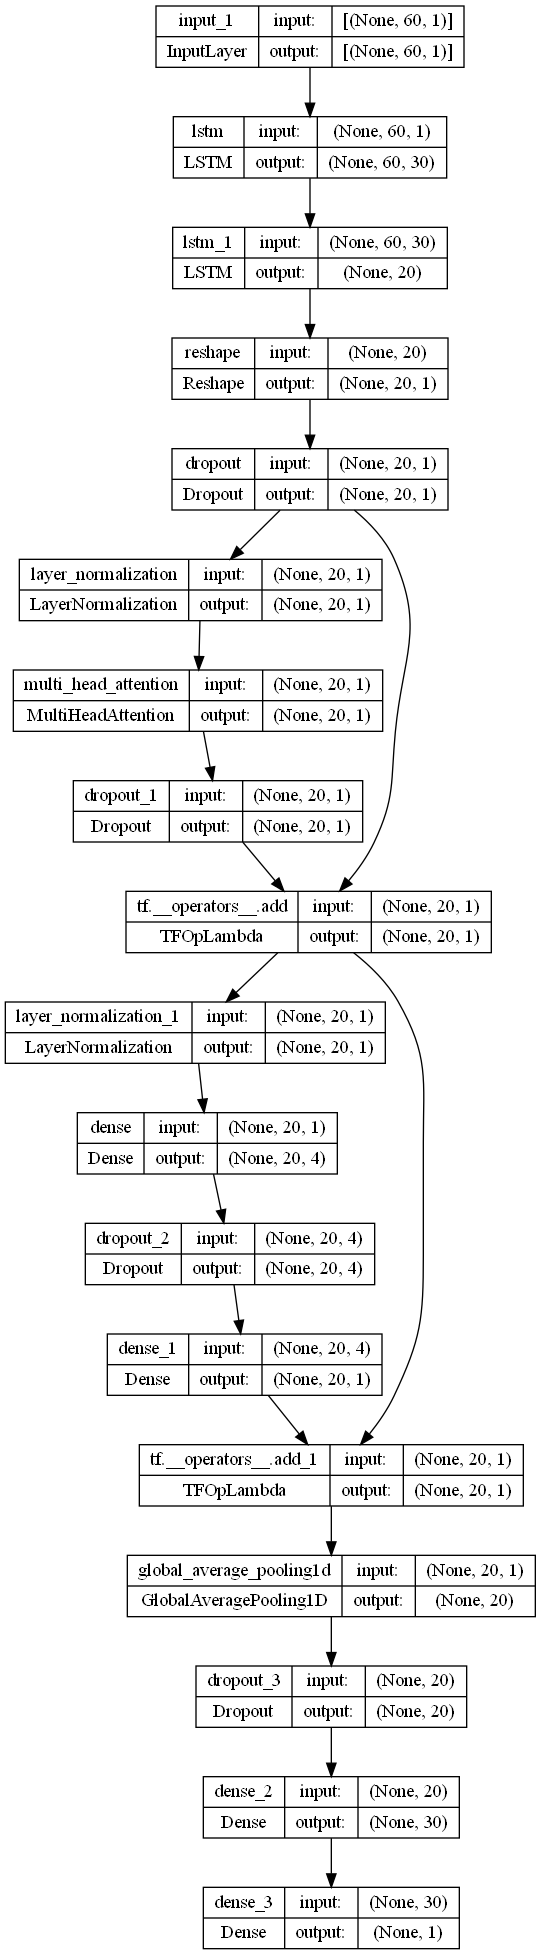

In [16]:
import keras

keras.utils.plot_model(model, "ensemble_model.png", show_shapes=True)

In [18]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     -------------------------------------- 45.0/45.0 kB 445.0 kB/s eta 0:00:00


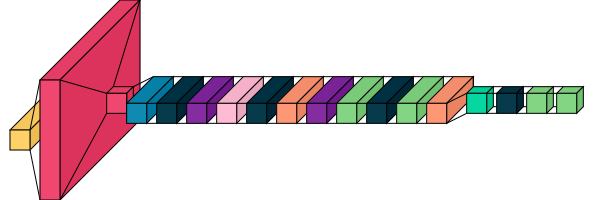

In [19]:
import visualkeras

#model = ...

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

In [34]:
import torch
from torchviz import make_dot

# create some sample input data
x = torch.randn(1, 3, 256, 256)

# generate predictions for the sample data
y = MyPyTorchModel()(x)

# generate a model architecture visualization
make_dot(y.mean(),
         params=dict(MyPyTorchModel().named_parameters()),
         show_attrs=True,
         show_saved=True).render("MyPyTorchModel_torchviz", format="png")

ModuleNotFoundError: No module named 'torchviz'

In [32]:
!pip install neutron

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 4.3/4.3 MB 626.1 kB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 655.0 kB/s eta 0:00:00
     -------------------------------------- 132.1/132.1 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 295.5/295.5 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 289.3/289.3 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 75.8/75.8 kB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 129.5/129.5 kB ? eta 0:00:00
     -------------------------------------- 132.1/132.1 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 112.9/112.9 kB 3.2 MB/s eta 0:00:00
     ------------------------------------ 107.5/107.5 kB 568.8 kB/s eta 0:00:00
     -------------------------

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [7 lines of output]
  C:\Users\dipayan\anaconda3\lib\site-packages\setuptools\config\setupcfg.py:463: SetuptoolsDeprecationWarning: The license_file parameter is deprecated, use license_files instead.
    warnings.warn(msg, warning_class)
  running bdist_wheel
  running build
  running build_ext
  building 'netifaces' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for netifaces
  error: subprocess-exited-with-error
  
  Running setup.py install for netifaces did not run successfully.
  exit code: 1
  
  [9 lines of output]
  C:\Users\dipayan\anaconda3\lib\site-packages\setuptools\config\setupcfg.py:463: SetuptoolsD

In [33]:
import neutron
neutron.start('LSTM_attention_model1.keras')

ModuleNotFoundError: No module named 'neutron'